# Stock Price Simulation (Monte Carlo)

### Alex Mendoza

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

## Part A: Stock Simulation Function

The goal of this section it to create a function which will simulate a stock price that will take arguments such as starting price, expected yield rate, volatility, and the timeframe in the stock market.

In [2]:
def simulate_stock(start, rate, vol, days):
    daily_yields = np.random.normal(loc = rate/252, scale = vol/(252**0.5), size = days)
    cumulative_yields = np.cumsum(daily_yields)
    daily_multipliers = np.exp(cumulative_yields)
    simulated_price = daily_multipliers * start
    path = np.concatenate(([start],simulated_price))
    return np.round(path,2)

The function above simulates the movement of a stock price with given parameters for starting amount, return rate, volatility, and the number of days. The output is an array with a simulated stock price with the starting value at the first position in the array.

Below, we are going to plot this function on a stock which has a current price of $500, expected yield of 8%, an annual volatility of 30%. This simulation will run for 60 days

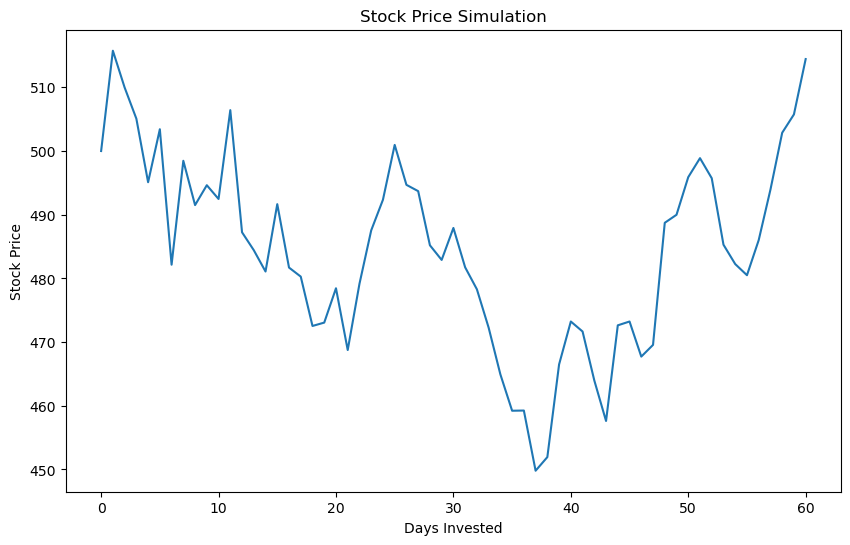

In [3]:
np.random.seed(1)

plt.figure(figsize=[10,6])

plt.plot(simulate_stock(500, .08, .3, 60)) #calling our function directly into a line plot

plt.title('Stock Price Simulation')
plt.xlabel('Days Invested')
plt.ylabel('Stock Price')
plt.show()

## Part B: Annual Yield Function

In this section, we will be creating a function which will calculate the annual yield of a stock based on the a simulated run.

In [4]:
def find_yield(run):
    days = len(run)-1
    init_price = run[0]
    last_price = run[-1]
    ann_yield = math.log(last_price/init_price)*252/days
    return round(ann_yield,4)

With the function above, we will test the outcome on our previous simulated run from the simulate_stock function.

In [5]:
np.random.seed(1)
find_yield(simulate_stock(500, .08, .3, 60))

0.1196

Next, we are going to explore variability of our stock price simulation by simulating and plotting 25 runs. additionally, we are going to save the stock yield results in a list to use later. The goal of this exercise is to show that while these are simulations, any combination of arguments provided to the simulate stock may have a variety of potential outcomes.

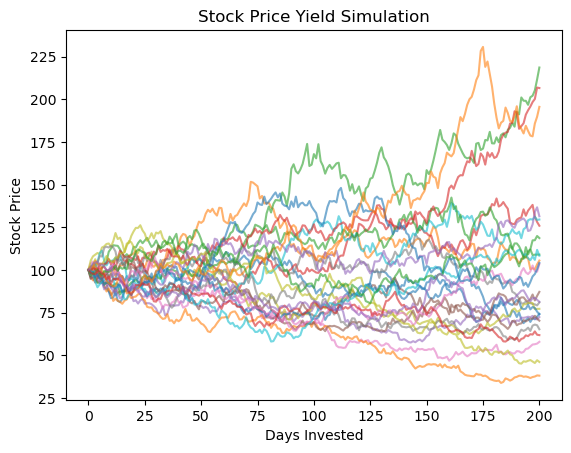

In [6]:
np.random.seed(25)
yield_results = []
for i in range(0,25):
    plt.plot(simulate_stock(100, .06, .4, 200), alpha = .6)
    plt.title('Stock Price Yield Simulation')
    plt.xlabel('Days Invested')
    plt.ylabel('Stock Price')
    y1 = find_yield(simulate_stock(100, .06, .4, 200))
    yield_results.append(y1)
plt.show()

Below are the results from our simulation of 25 runs over a 200 day period.

In [7]:
print(yield_results)

[0.3753, 0.3859, -0.0509, 0.135, 0.5586, 0.337, -0.2005, 0.1105, -0.4335, 0.0013, -0.1198, -0.1785, 0.3019, 0.5267, -0.0801, 0.4893, -0.3137, 0.5696, -0.5215, -0.3428, 0.3001, 0.3301, 0.3573, -0.0697, 0.1883]


## Part C: Finding Seeds that Generate Specific Outcomes

In this section we will explore the use of seeds with the np.random.seed() function. Specifically, this exercise is used to demonstrate that while random is in the function, random seeds are not 100% random, rather they are considered pseudo-random. In the following code cells, I will have adjusted the seed for the same simulate_stock function parameters to intentionally have either Stock A, B or C outperform the others.

In the cell below, Stock A has the highest simulated final price.

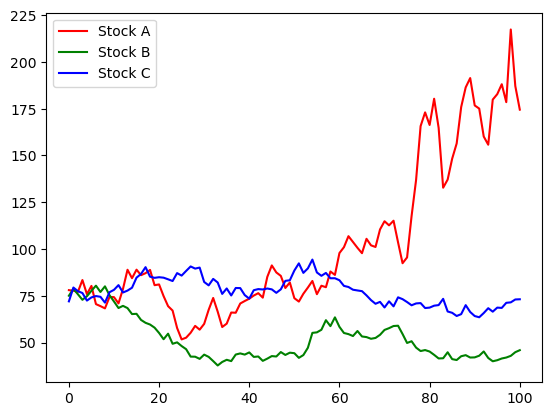

In [8]:
np.random.seed(21)

plt.plot(simulate_stock(78, .04, 1.2, 100), color = 'red', label = "Stock A")
plt.plot(simulate_stock(75, .08, 0.8, 100), color = 'green', label = "Stock B")
plt.plot(simulate_stock(72, .16, 0.6, 100), color = 'blue', label = "Stock C")
plt.legend()
plt.show()

In the cell below, Stock B has the highest simulated final price.

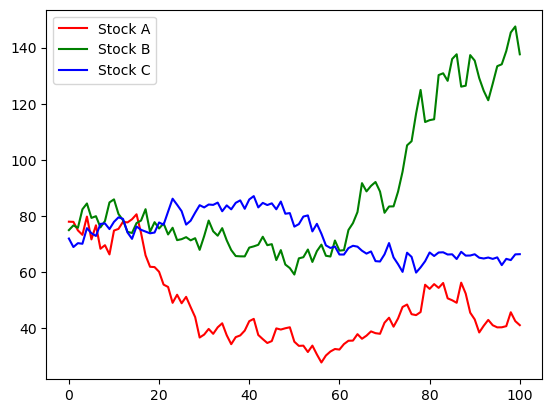

In [9]:
np.random.seed(62)

plt.plot(simulate_stock(78, .04, 1.2, 100), color = 'red', label = "Stock A")
plt.plot(simulate_stock(75, .08, 0.8, 100), color = 'green', label = "Stock B")
plt.plot(simulate_stock(72, .16, 0.6, 100), color = 'blue', label = "Stock C")
plt.legend()
plt.show()

In the cell below, Stock C has the highest simulated final price.

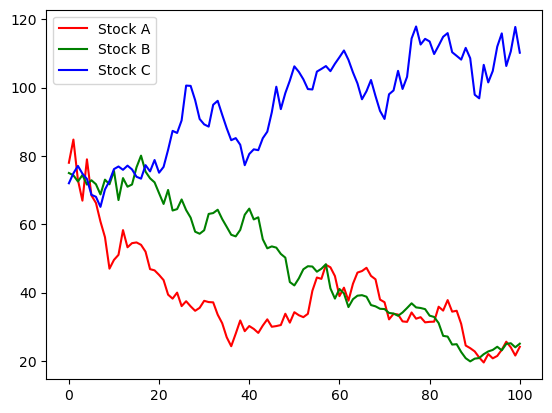

In [10]:
np.random.seed(64)

plt.plot(simulate_stock(78, .04, 1.2, 100), color = 'red', label = "Stock A")
plt.plot(simulate_stock(75, .08, 0.8, 100), color = 'green', label = "Stock B")
plt.plot(simulate_stock(72, .16, 0.6, 100), color = 'blue', label = "Stock C")
plt.legend()
plt.show()

## Part D: Monte Carlo Simulation

A Monte Carlo simulation which will be created in this section, is a tool not used for predictive analysis, but to provide a range of proabable outcomes for a stock price given parameters for starting price, estimated returns, volatility, days in market, as well as a final condition which specifies how many simulations we are going to run. 

In this section/function, you will see that the primary difference from the simulate_stock function is a num_runs parameter, which is primarily used in our loop to simulate several possible outcomes of a stock simulation

In [11]:
def monte_carlo(start, rate, vol, days, num_runs):
    final_prices = []
    annual_yields = []
    
    for i in range(num_runs):
        sim_run = simulate_stock(start, rate, vol, days)
        final_price = sim_run[-1]
        final_prices.append(final_price)
        
        ann_yield = find_yield(sim_run)
        annual_yields.append(ann_yield)
    return np.array(final_prices), np.array(annual_yields)

Below we are calling our monte_carlo function. Again, while this isn't necessarily predictive, it does give us an idea of future performance using a range of possible outcomes. 

For this example, we are putting the monte carlo function to test and display the results on a histogram. Additionally, I am opting to subplot this function using the same price, expected yield, and days in market, and number of runs but changing the volatility levels of the stock. As expected, we see the stock with a higher volatility have more instances higher gains and losses, while the less volatile stock has more moderate gains and losses.

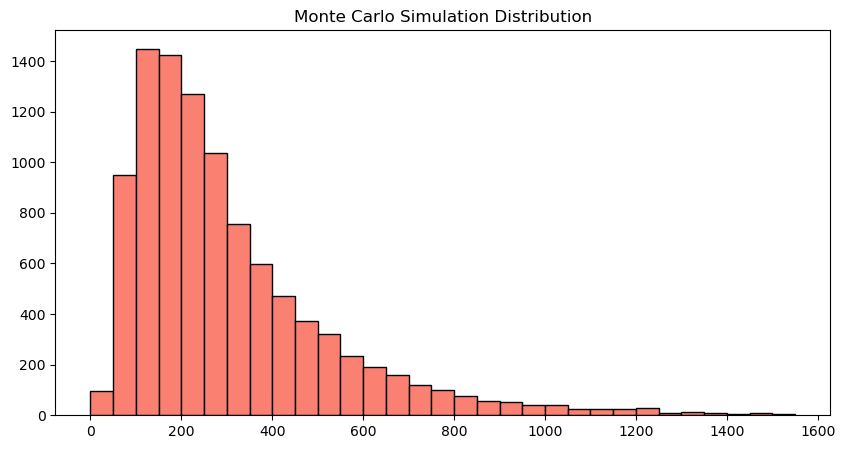

In [12]:
np.random.seed(1)

final_prices_1, final_yields_1 = monte_carlo(200, 0.10, .50, 500, 10000)

plt.figure(figsize=[10,5])

plt.hist(final_prices_1, bins = np.arange(0,1600,50), edgecolor = 'k', color = 'salmon')
plt.title('Monte Carlo Simulation Distribution')

plt.show()



Next, we are going to look at our results a little bit deeper. We are going to use numpy's percentile function to calculate the 10th, 25th, 50th, 75th, and 90th percentiles of the final prices in our simulated runs.

In [13]:
percentiles = [10,25,50,75,90]

print('Highly Volatile Percentiles:')
for i in range(len(percentiles)):
    final = np.percentile(final_prices_1,percentiles[i])
    print(f'{percentiles[i]}th percentile:','$',f'{round(final,2)}'.rjust(6))


Highly Volatile Percentiles:
10th percentile: $  98.46
25th percentile: $ 150.29
50th percentile: $ 242.72
75th percentile: $ 393.45
90th percentile: $ 607.14


## Part E: Effects of Volatility

In the cells below, we are going to going to test more effects of volatility on stocks. To do this, we are going to run two Monte Carlo simulations with different levels of volatility. Our end goal is to get the average annual yield for each stock at different volatility levels. We can expect stocks with a higher volatility to have a wider range of possible outcomes.

In [14]:
stocks = ['A','B']
run_count = 10000
days_long = 150
start_price = 100
expected_yield = .12
vol_test = [.3,.7]

np.random.seed(1)

for i in range(len(stocks)):
    v = vol_test[i]
    prices, yields = monte_carlo(start_price, expected_yield,vol_test[i],days_long,run_count)
    print(f'Average Annual Yield for {stocks[i]} over {run_count} runs: {np.mean(yields):.4}')

Average Annual Yield for A over 10000 runs: 0.1218
Average Annual Yield for B over 10000 runs: 0.1128


Next, we are going to visually compare the results of each Monte Carlo Simulation with histograms to represent the final prices of each stock.

Generally, we would expect the stocks with higher volatility to have a wider range yielding higher returns and higher losses. Subsequently, less volatile stocks would likely have a "tighter" distribution with less frequent instances of higher gains and higher losses. For this comparison, I will plot overlapping histograms as a representation. 

Stock A will represent our less-volatile stock, and stock B will represent our highly-volatile stock.

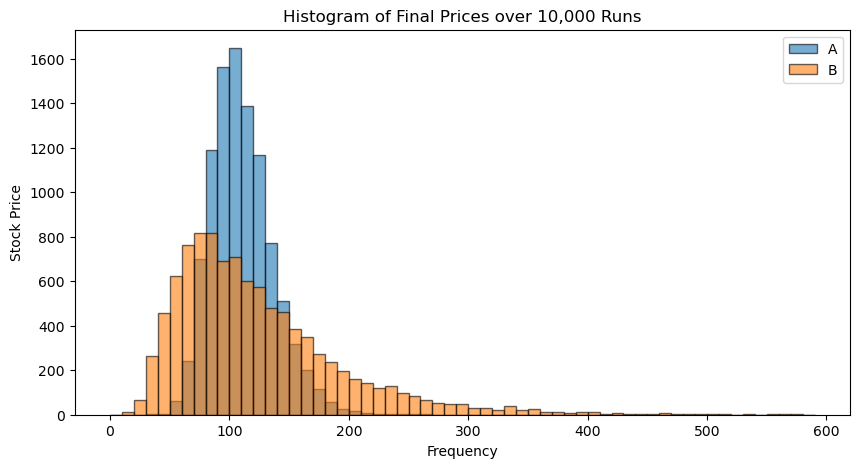

In [15]:
stocks = ['A','B']
run_count = 10000
days_long = 150
start_price = 100
expected_yield = .12
vol_test = [.3,.7]

alpha = 0.6

np.random.seed(1)

plt.figure(figsize=[10,5])

for i in range(len(stocks)):
    v = vol_test[i]
    prices, yields = monte_carlo(start_price, expected_yield,vol_test[i],days_long,run_count)
    plt.hist(prices, bins = np.arange(0,600,10), edgecolor = 'k', alpha = alpha, label = stocks[i])
    plt.legend()
    plt.title('Histogram of Final Prices over 10,000 Runs')
    plt.ylabel('Stock Price')
    plt.xlabel('Frequency')
plt.show()

## Part F: Comparing Two Stocks

In this section, I am going to compare two different stocks with the same starting price, and number of days, and number of runs. I will be assigning different expected yield and volatility levels to each stock.

My goal is to get an understanding of potential outcomes of two different stocks by obtaining proportions of simulations which Stock A ends at higher prices than Stock B, as well as proportions when Stock A or B are above or below Thresholds (150/100).

In [16]:
np.random.seed(1)
num_run = 10000
num_day = 252
start_p = 120
yield_a = .08
yield_b = .05
vol_a = .2
vol_b = .5

a_prices, a_yields = monte_carlo(start_p, yield_a, vol_a, num_day, num_run)
b_prices, b_yields = monte_carlo(start_p, yield_b, vol_b, num_day, num_run)

head = 'Proportions of runs in which...'

print(head)
print('-' * len(head))
print(f'A ends above B   :',f'{np.mean(a_prices > b_prices)*100:.2f}%'.rjust(12),'\n')
print(f'A ends above 150 :',f'{np.mean(a_prices > 150)*100:.2f}%'.rjust(12))
print(f'B ends above 150 :',f'{np.mean(b_prices > 150)*100:.2f}%'.rjust(12),'\n')
print(f'A ends below 100 :',f'{np.mean(a_prices < 100)*100:.2f}%'.rjust(12))
print(f'B ends below 100 :',f'{np.mean(b_prices < 100)*100:.2f}%'.rjust(12))

Proportions of runs in which...
-------------------------------
A ends above B   :       52.06% 

A ends above 150 :       23.38%
B ends above 150 :       36.19% 

A ends below 100 :        9.50%
B ends below 100 :       31.95%


## Part G: Expected Call Payoff

In this last section, I explore call options. A call option is essentially a win/lose bet on a particular stock. Each stock has a set price that must be hit over the period of X days, and if the stock reaches that point, you are awarded a payout amount worth the current price minus the stock strike price. Our goal in the cell below is to run a Monte Carlo simulation on a stock to anticipate what the average call payoff would be if executed 10,000 times.

In [17]:
cstart = 200
cyield = .11
cvol = .4
cdays = 150
cstrike = 225
cruns = 10000

np.random.seed(1)

cprice, cyield = monte_carlo(cstart, cyield, cvol, cdays, cruns)

result = cprice - cstrike
result_no_neg = np.where(result < 0 , 0, result)

print(f'The average call payoff over {cruns} simulated run is ${np.mean(result_no_neg):.2f}')

The average call payoff over 10000 simulated run is $27.10
